In [ ]:
import tensorflow as tf

from tqdm import tqdm_notebook

## Данные

CIFAR10
* 60000 RGB изображений размером 32x32x3
* 10 классов: самолёты, собаки, рыбы и т.п.

<img src="https://www.samyzaf.com/ML/cifar10/cifar1.jpg" style="width:60%">

In [ ]:
import numpy as np
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=10**4, random_state=42)

class_names = np.array(['airplane','automobile ','bird ','cat ','deer ','dog ','frog ','horse ','ship ','truck'])

print (X_train.shape,y_train.shape)

(40000, 32, 32, 3) (40000, 1)


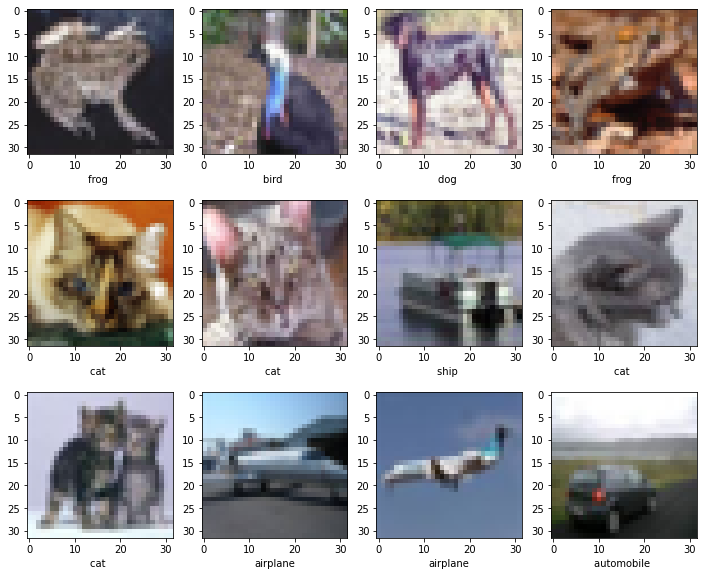

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=[12,10])
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.xlabel(class_names[y_train[i, 0]])
    plt.imshow(X_train[i])

In [ ]:
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

In [ ]:
assert np.shape(X_train) == (40000, 32, 32, 3), "data shape should not change"
assert 0.9 <= max(map(np.max, (X_train, X_val, X_test))) <= 1.05
assert 0.0 <= min(map(np.min, (X_train, X_val, X_test))) <= 0.1
assert len(np.unique(X_test / 255.)) > 10, "make sure you casted data to float type"

In [ ]:
import keras
from keras import layers as L
from keras import backend as K
from keras.layers import Dense

In [ ]:
model = keras.models.Sequential([L.Conv2D(filters = 16, kernel_size = 10, input_shape = (32, 32, 3), padding = 'same', activation = 'relu')])

In [ ]:
model.add(L.Flatten())

In [ ]:
tf.keras.layers.Dense(64, activation='selu')

In [ ]:
model.add(Dense(10, activation='softmax'))

In [ ]:
model.predict([X_train[:20]]).shape

(20, 10)

In [ ]:
dummy_pred = model.predict([X_train[:20]])
assert dummy_pred.shape == (20, 10)
assert np.allclose(dummy_pred.sum(-1), 1)
print("Успех!")

Успех!


In [ ]:
y_train, y_val = (keras.utils.np_utils.to_categorical(y) for y in (y_train, y_val))

In [ ]:
callbacks = tf.keras.callbacks.EarlyStopping(patience = 3, monitor = 'loss')
sgd = tf.keras.optimizers.SGD(learning_rate = 0.08, momentum = 0.6)

In [ ]:
model.compile(optimizer = sgd, loss = keras.losses.SquaredHinge())
model.fit(X_val, y_val, epochs = 12, callbacks = callbacks)

Epoch 1/12
313/313 [==============================] - 1s 4ms/step - loss: 1.1476
Epoch 2/12
313/313 [==============================] - 1s 4ms/step - loss: 1.1238
Epoch 3/12
313/313 [==============================] - 1s 4ms/step - loss: 1.1122
Epoch 4/12
313/313 [==============================] - 1s 4ms/step - loss: 1.1041
Epoch 5/12
313/313 [==============================] - 1s 4ms/step - loss: 1.0981
Epoch 6/12
313/313 [==============================] - 1s 4ms/step - loss: 1.0906
Epoch 7/12
313/313 [==============================] - 1s 4ms/step - loss: 1.0853
Epoch 8/12
313/313 [==============================] - 1s 4ms/step - loss: 1.0807
Epoch 9/12
313/313 [==============================] - 2s 5ms/step - loss: 1.0749
Epoch 10/12
313/313 [==============================] - 1s 4ms/step - loss: 1.0708
Epoch 11/12
313/313 [==============================] - 1s 4ms/step - loss: 1.0666
Epoch 12/12
313/313 [==============================] - 1s 4ms/step - loss: 1.0612


А теперь можно проверить качество вашей сети, выполнив код ниже:

In [ ]:
predict_x = model.predict(X_test) 
classes_x = np.argmax(predict_x, axis = 1)

In [ ]:
from sklearn.metrics import accuracy_score
test_acc = accuracy_score(y_test, classes_x)
print("\n Test_acc =", test_acc)
assert test_acc > 0.45, "Not good enough. Back to the drawing board :)"
print(" Not bad!")


 Test_acc = 0.4629
 Not bad!


In [ ]:
model = keras.models.Sequential()

In [ ]:
model.add(L.Conv2D(filters = 10, kernel_size = (3, 3), padding = 'same', activation = 'relu'))

In [ ]:
model.add(L.MaxPool2D(pool_size=(2, 2), padding = 'valid'))

In [ ]:
model.add(L.Flatten())

In [ ]:
model.add(Dense(100, activation = 'selu'))
model.add(Dense(10, activation = 'softmax'))

In [ ]:
sgd = tf.keras.optimizers.SGD(learning_rate = 0.09, momentum = 0.6)

In [ ]:
model.compile(optimizer = sgd, loss = keras.losses.SquaredHinge())

In [ ]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 3)

Epoch 1/3
1250/1250 [==============================] - 5s 4ms/step - loss: 1.1321 - val_loss: 0.6954
Epoch 2/3
1250/1250 [==============================] - 5s 4ms/step - loss: 1.0980 - val_loss: 0.7476
Epoch 3/3
1250/1250 [==============================] - 4s 4ms/step - loss: 1.0804 - val_loss: 0.7911


Давайте посмотрим, смогла ли карманная сверточная сеть побить заданный порог по качеству:

In [ ]:
predict_x = model.predict(X_test) 
classes_x = np.argmax(predict_x, axis = 1)

In [ ]:
from sklearn.metrics import accuracy_score
test_acc = accuracy_score(y_test, classes_x)
print("\n Test_acc =", test_acc)
assert test_acc > 0.50, "Not good enough. Back to the drawing board :)"
print(" Not bad!")


 Test_acc = 0.5019
 Not bad!
